<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

In [10]:
x = tf.zeros([10, 10])
x += 2
print(x)
print(x.shape)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)
(10, 10)


In [11]:
v = tf.Variable(1.0)
print(v == 1.0)
print(v.numpy() == 1.0)
print(v)
print(v.numpy())

False
True
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
1.0


In [14]:
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()  

print(model(3.0).numpy() == 15.0) 

True


In [0]:
def loss(predictd_y, desired_y):
  return tf.reduce_mean( tf.square(predictd_y - desired_y) )

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLE = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLE])
noise = tf.random_normal(shape=[NUM_EXAMPLE])
outputs = inputs * TRUE_W + TRUE_b + noise

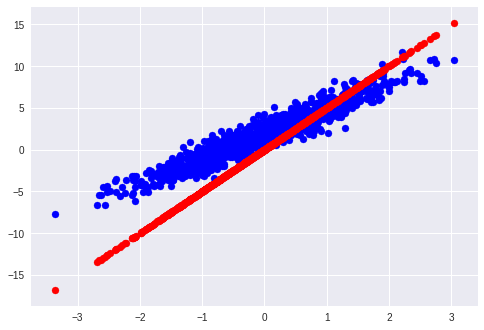

Current loss: 
8.938043


In [18]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')

plt.show()
print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.93804
Epoch  1: W=3.96 b=0.98, loss=2.83765
Epoch  2: W=3.46 b=1.47, loss=1.38467
Epoch  3: W=3.22 b=1.71, loss=1.03796
Epoch  4: W=3.10 b=1.83, loss=0.95507
Epoch  5: W=3.05 b=1.90, loss=0.93522
Epoch  6: W=3.02 b=1.93, loss=0.93045
Epoch  7: W=3.01 b=1.94, loss=0.92931
Epoch  8: W=3.01 b=1.95, loss=0.92903
Epoch  9: W=3.00 b=1.95, loss=0.92896


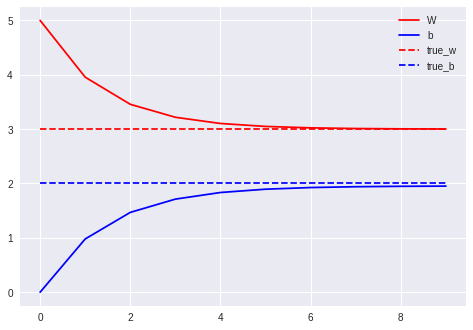

In [30]:
model = Model()
Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  
  train(model, inputs, outputs, learning_rate = 0.25)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' 
        % (epoch, Ws[-1], bs[-1], current_loss ))
      
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
           [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true_w', 'true_b'])
plt.show()

In [0]:
# Custom layers

In [39]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    
  def build(self, input_shape):
    self.kernel = self.add_variable("kernel", 
                                    shape= [int(input_shape[-1]), 
                                            self.num_outputs]
                                   )
  def call(self, input):
    return tf.matmul(input, self.kernel)
  
  
layer = MyDenseLayer(10)

print(layer(tf.zeros([10, 5])))
print(layer.variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_3/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-2.9230899e-01,  3.5404295e-01,  4.4773620e-01, -2.8072339e-01,
         3.5690308e-02, -1.8938243e-01, -8.4578216e-02, -1.5376753e-01,
         1.0771352e-01,  2.3322272e-01],
       [-3.7067518e-01, -5.4549253e-01, -1.6326198e-01,  1.4559537e-01,
         5.7696050e-01, -3.1457254e-01, -5.7345688e-01,  2.1465600e-02,
         1.4600933e-02,  8.2926512e-02],
       [ 5.9266132e-01,  2.3407286e-01,  1.5621001e-01,  2.5949484e-01,
         1.6292572e-01,  2.1289271e-01,  4.1357797e-01,  1.1811781e-01,
         5.6842983e-02,  4.1632670